In [ ]:
        # This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

**Problem Statement**

The COVID-19 Pandemic has disrupted learning for more than 56 million students in the United States. In the Spring of 2020, most states and local governments across the U.S. closed educational institutions to stop the spread of the virus. In response, schools and teachers have attempted to reach students remotely through distance learning tools and digital platforms. Until today, concerns of the exacaberting digital divide and long-term learning loss among America’s most vulnerable learners continue to grow.

**Challenge**

The challenge is to explore 
1. The state of digital learning in 2020 
2. How the engagement of digital learning relates to factors such as district demographics, broadband access, and state/national level policies and events.

Some of the questions tackled are:
* What is the picture of digital connectivity and engagement in 2020?
* What is the effect of the COVID-19 pandemic on online and distance learning, and how might this also evolve in the future?
* How does student engagement with different types of education technology change over the course of the pandemic?
* How does student engagement with online learning platforms relate to different geography? Demographic context (e.g., race/ethnicity, ESL, learning disability)? Learning context? Socioeconomic status?
* Do certain state interventions, practices or policies (e.g., stimulus, reopening, eviction moratorium) correlate with the increase or decrease online engagement?

# Import the necessary packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import pathlib
import os
import glob


# Importing the datasets


In [ ]:
#districts information
district_df=pd.read_csv('/kaggle/input/learnplatform-covid19-impact-on-digital-learning/districts_info.csv')
district_df.head()

**Information on the Districts Dataset**

**district_id**: The unique identifier of the school district

**state**: The state where the district resides in 

**locale**: NCES locale classification that categorizes U.S. territory into four types of areas: City, Suburban, Town, and Rural. 

**pct_black/hispanic**: Percentage of students in the districts identified as Black or Hispanic based on 2018-19 NCES data 

**pct_free/reduced** ; Percentage of students in the districts eligible for free or reduced-price lunch based on 2018-19 NCES data 

**county_connections_ratio** : `ratio` (residential fixed high-speed connections over 200 kbps in at least one direction/households) 

**pp_total_raw** : Per-pupil total expenditure (sum of local and federal expenditure). The expenditure data are school-by-school, and we use the median value to represent the expenditure of a given school district. 


In [ ]:
#products dataset
product_df=pd.read_csv('/kaggle/input/learnplatform-covid19-impact-on-digital-learning/products_info.csv')
product_df.head()

**Information on the products dataset**

**LP ID**: The unique identifier of the product 

**URL** : Web Link to the specific product 

**Product Name** :Name of the specific product 

**Provider/Company Name** : Name of the product provider 

**Sector(s)**;  Sector of education where the product is used 

**Primary Essential Function**: The basic function of the product. There are two layers of labels here:
*     Products are first labeled as one of these three categories: LC = Learning & Curriculum, CM = Classroom
        Management, and SDO = School & District Operations. 
*     Each of these categories have multiple sub-categories with which the products were labeled 

In [ ]:
#example of the engagement dataset
engag_df=pd.read_csv('/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/6345.csv')
engag_df.head()

**Information on the engagements dataset**

**lp_id**: The unique identifier of the product 

**pct_access** : Percentage of students in the district have at least one page-load event of a given product and on a given day 

**engagement_index**: Total page-load events per one thousand students of a given product and on a given day 

# Data Preprocessing

Data preprocessing will involve identifying and handling missing values, merging related datasets .


First all the school district files in the *engagement_data* folder will be merged into one file, ***all_engagement_data.csv*** then the *district_id* from district dataset willl be added to the file.

The glob package can be used to return a group of files as a list which will then be passed into a dataframe

In [ ]:
#obtaining all the files in the engagement directory and store them in a csv file
new_dir="/tmp/new_data/"
path = r'/kaggle/input/learnplatform-covid19-impact-on-digital-learning/engagement_data/'
all_files = glob.glob(path + "/*.csv")
all_files

engagement_file = (pd.read_csv(f, sep=',') for f in all_files)
df_from_each_file = (pd.read_csv(f, sep=',') for f in all_files)
engagement_file = pd.concat(df_from_each_file, ignore_index=True)
engagement_file.to_csv( "all_engagement_data.csv")

In [ ]:
### Adapted from 'How To Approach Analytics Challenges' by Leonie
PATH = '../input/learnplatform-covid19-impact-on-digital-learning/engagement_data' 

temp = []

for district in district_df.district_id.unique():
    df = pd.read_csv(f'{PATH}/{district}.csv', index_col=None, header=0)
    df["district_id"] = district
    temp.append(df)
    
    
engagement_df = pd.concat(temp)
engagement_df = engagement_df.reset_index(drop=True)

In [ ]:
#engagement school district files
engagement_df.head()


In [ ]:
#merge the product dataset with the engagement dataset based on the unique product identifier
prod_eng=pd.merge(left=engagement_df, right=product_df,
         on=None, left_on='lp_id', right_on='LP ID') 

prod_eng.head()


# Exploratory Data Analysis

General understanding of the ,the datatypes of the variables, number of datapoints to be analyzed, number of unique values in each column,splitting some of the columns to get better insights.

### Statistical attributes for each dataset


In [ ]:
district_df.info()

In [ ]:
prod_eng.describe()

In [ ]:
prod_eng.info()

In [ ]:
def df_shape(df):
    # number of data points
    row=df.shape[0]
    column=df.shape[1]
    print(f" There are {row} rows and {column} columns")

In [ ]:

df_shape(district_df)

In [ ]:
df_shape(prod_eng)

### Identify the unique values in each column in the datasets

In [ ]:
def unique_values(df):
    unique_values=pd.DataFrame(df.apply(lambda x: len(x.value_counts(dropna=False)), axis=0), 
                           columns=['Unique Value Count']).sort_values(by='Unique Value Count', ascending=True)
    return unique_values


In [ ]:
#unique values in the district dataset
unique_values(district_df)

In [ ]:
#unique values in the product-engagement dataset
unique_values(prod_eng)

### Identify missing values in the datasets


In [ ]:
def missing_values(df):
    # Total number of elements in the dataset
    totalCells = df.size
    #Number of missing values per column
    missingCount = df.isnull().sum()
    #Total number of missing values
    totalMissing = missingCount.sum()
    # Calculate percentage of missing values
    print("The dataset contains", round(((totalMissing/totalCells) * 100), 2), "%", "missing values.")
    
def column_missingdata(df):
    #check for missing values per column
    values=df.isnull().sum().sort_values(ascending=False)
    #percentage of missing values per column
    percentage=df.isnull().mean()*100
    return percentage    
    
    

In [ ]:

#district
missing_values(district_df)
column_missingdata(district_df)

In [ ]:
#product-engagement dataset
missing_values(prod_eng)
column_missingdata(prod_eng)

### Handling missing values for each dataframe
If all the rows that are missing values in the datasets are dropped, alot of data will be lost, therefore we can decide to drop rows that are missing values in a particular column. For the districts dataframe we can drop the rows that are missing values in the state column.This will also affect locale and pct_black/hispanic columns. N/B : Check for relationship between pct_black/hispanic and state.

In [ ]:
#district
district_df_clean = district_df[district_df.state.notna()].reset_index(drop=True)
column_missingdata(district_df_clean)

In [ ]:
# prod_eng
prod_eng_clean = prod_eng[prod_eng['Primary Essential Function'].notna()].reset_index(drop=True)
column_missingdata(prod_eng_clean)



Replace with the mean value of the column

In [ ]:
def fill_mean(dataframe,column):
    #replace missing values with mean 
    dataframe[column].fillna(dataframe[column].mean(), inplace = True)
    

In [ ]:
# prod_eng
fill_mean(prod_eng_clean,'engagement_index')
fill_mean(prod_eng_clean,'pct_access')


Using the forward fill method to fill in missing values for district dataset

In [ ]:
# district_df
def fix_missing_ffill(df, col):
    df[col] = df[col].fillna(method='ffill')
   

In [ ]:
fix_missing_ffill(district_df_clean,'pct_free/reduced')
fix_missing_ffill(district_df_clean,'county_connections_ratio')
fix_missing_ffill(district_df_clean,'pp_total_raw')

In [ ]:
column_missingdata(district_df_clean)

### Preprocessing some of the columns



#### Find the average of the columns with interval entries

In [ ]:
## Adapted from Data Wrangling, EDA and future Actions by Chris Solomou
def data_wrangling(df,column): 
    '''
    Calculates the midpoint of variables where their values 
    are given as a range. 
    '''
    ls = []
    x = 'avg_' + str(column) 
    df[x] = np.NaN
    for row in df[column]:
        if type(row) == float:
            # Append NA so the length is the same and 
            # replace later with the column avg 
            ls.append(np.NaN) 
        else:
            ls.append((float(row.split('[')[1].split(',')[0]) + float(row.split('[')[1].split(',')[1])) / 2)
    ls = [round(x,2) for x in ls]
    df[x] = ls  
                   
    return df

In [ ]:
columns=['pct_black/hispanic','pct_free/reduced','county_connections_ratio','pp_total_raw']
for column in columns:
    district_info=data_wrangling(district_df_clean,column)
    del district_info[column]

In [ ]:
district_info.head()

Since all the datasets have been processed for analysis, the next section will be analysis of the data

# Graphical Analysis

In [ ]:
##plots

def plot_hist(df:pd.DataFrame, column:str, color:str)->None:
    sns.displot(data=df, x=column,color=color, kde=True, height=7, aspect=2)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.xticks(rotation=90)
    plt.show()

def plot_count(df:pd.DataFrame, column:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.countplot(data=df, x=column,order=df[column].value_counts().index)
    plt.title(f'Distribution of {column}', size=20, fontweight='bold')
    plt.xticks(rotation=90)
    plt.show()
    
def plot_bar(df:pd.DataFrame, x_col:str, y_col:str, title:str, xlabel:str, ylabel:str)->None:
    plt.figure(figsize=(12, 7))
    sns.barplot(data = df,x=x_col,y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=90, fontsize=14)
    plt.yticks( fontsize=14)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.show()

def plot_heatmap(df:pd.DataFrame, title:str, cbar=False)->None:
    plt.figure(figsize=(12, 7))
    sns.heatmap(df, annot=True, cmap='viridis', vmin=0, vmax=1, fmt='.2f', linewidths=.7, cbar=cbar )
    plt.title(title, size=18, fontweight='bold')
    plt.show()

def plot_box(df:pd.DataFrame, x_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.show()

def plot_box_multi(df:pd.DataFrame, x_col:str, y_col:str, title:str) -> None:
    plt.figure(figsize=(12, 7))
    sns.boxplot(data = df, x=x_col, y=y_col)
    plt.title(title, size=20)
    plt.xticks(rotation=75, fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def plot_scatter(df: pd.DataFrame, x_col: str, y_col: str, title: str, hue: str, style: str) -> None:
    plt.figure(figsize=(12, 7))
    sns.scatterplot(data = df, x=x_col, y=y_col, hue=hue, style=style)
    plt.title(title, size=20)
    plt.xticks(fontsize=14)
    plt.yticks( fontsize=14)
    plt.show()

def correlation(df:pd.DataFrame):
    corr=df.corr()
    #matrix=np.triu(df.corr())
    sns.heatmap(corr,annot=True,square=True)
    fig=plt.gcf()
    figsize=fig.get_size_inches()
    fig.set_size_inches(figsize*4)
    plt.show()



#  District demographics

#### Number of school districts per state

In [ ]:
plot_count(district_info,'state')


This shows the number of school districts per each state. Connecticut has the most number of school districts while Minnesota,Arizona,Florida and North Dakota has the least number of school districts

#### Number of school districts per locale

In [ ]:
fig = px.pie(district_info, names='locale')
fig.show()

59% of the school districts are in the suburbs while the towns have the least number of school districts(5.68%)

In [ ]:
state=district_info.groupby('state')
locale=district_info.groupby('locale')

state.groups
for name,group in locale:
    print(name,'contains',group.shape[0],'entries')

In [ ]:
City=locale.get_group('City').reset_index()
Rural=locale.get_group('Rural')
Suburb=locale.get_group('Suburb')
Town=locale.get_group('Town')

#### Average connectivity per state and locale

In [ ]:

plot_bar(district_info,'state','avg_county_connections_ratio','Connections per State','State','Average Connections')

 North Dakota a significantly higher average speed of connection compared to the other states, Massachussets too has high speed. The average speed of connection in all the other states is the same.
 
North Dakota is generally known to have high speed of internet connection due to a number of reasons as highlighted in [this article](https://www.newamerica.org/weekly/how-did-north-dakota-become-crown-jewel-internet-midwest/): 

An image showing the rate of internet speed in different US States. North Dakota has been highlighted

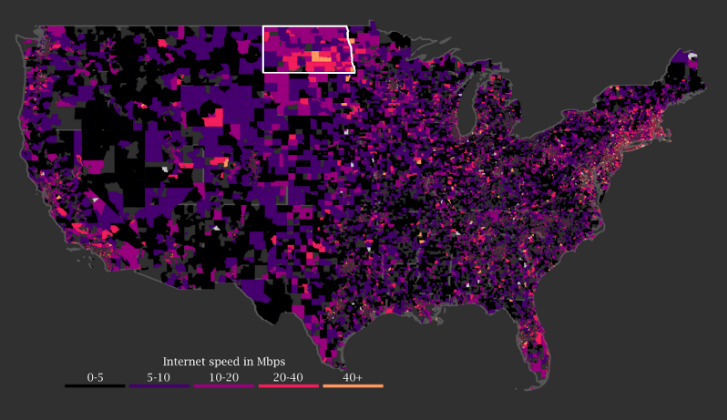!


In [ ]:
plot_bar(district_info,'locale','avg_county_connections_ratio',
         'Connections per Locale','Locale','Average Connections')

The average high speed connections seems to be higher in the rural areas when compared to other locations

#### Average expenditure per student

In [ ]:
plot_bar(district_info,'state','avg_pp_total_raw','Student Expenditure per State','State','Expenditure')

The top three states in average expenditure per student are in the following states: New York, District of Columbia and New Jersey while the lowest expenditure is in Florida State and Utah

In [ ]:
plot_bar(district_info,'locale','avg_pp_total_raw',
         'Average Student Expenditure per Locale','Locale','Expenditure')

The rural area seems to have the highest student expenditure while the town has the least

#### Distribution of black/hispanic students

In [ ]:
plot_bar(district_info,'state','avg_pct_black/hispanic','Distribution of black/hispanic students','State','Percentage of Black/Hispanic Students')

The top three states with the highest number of black/hispanic students are Arizona, District of Columbia,Texas. The least number of black/hispanic students are in Wisconsin,Missouri,New Jersey,North Dakota, New Hampshire

In [ ]:
plot_bar(district_info,'locale','avg_pct_black/hispanic','Distribution of black/hispanic students','Locale','Percentage of Black/Hispanic Students')

#### Students who receive free/reduced lunch

In [ ]:
plot_bar(district_info,'state','avg_pct_free/reduced','Distribution ofstudents receiving free lunch','State','Percentage of Students who receive free/reduced lunch')

A high percentage of students in Minnesota, Indiana,Michigan receive free/reduced lunch

In [ ]:
plot_bar(district_info,'locale','avg_pct_free/reduced','Distribution ofstudents receiving free lunch','Locale','Percentage of Students who receive free/reduced lunch')

#### General Insights from this analysis

1. Suburbs have the most number of school districts
2. North Dakota and Massacheusetts have a significantly higher connectivity ratio compared to other states
3. The connectivity ratio in rural area is higher than other areas. This could be because states like North Dakota are regarded to be rural and have a connectivity ratio
4. The expenditure per student is highest in New York state and lowest in Florida state
5. Arizona has the highest percentage of black/hispanic students while Wisconsin has the lowest.
6. The percentage of students receiving free/reduceed lunch is highest in Minnesota, and lowest in New Jersey,Arizona, North Dakota


# Product-Engagement Analysis

The products dataset and engagement datasets have been merged and cleaned to form a single dataset ***prod_eng_clean*** in the preprocessing stage. This will be used for this analysis

### Points for product analysis
1. The top products and least-used products per state and locale
2. The top  and least product-providers
3. The sectors involved-A look at the products predominantly used in each sector
4. The function(Primary and Secondary function) of the products

### Points for engagement analysis
1. Average engagement index per state,locale
2. The percentage of access

### General analysis
1. Look at time and days of product use



#### The top products used by the students

In [ ]:
# the top 10 products used by the students.

prod_count=pd.DataFrame(prod_eng_clean.groupby('Product Name')['district_id'].count())
prod_count['Product Name'] = prod_count.index
prod_count.rename(columns = {"district_id": "product_count"}, inplace=True)
prod_count_large=prod_count.nlargest(10,'product_count')
prod_count_least=prod_count.nsmallest(10,'product_count')

In [ ]:
plot_bar(prod_count_large,'Product Name','product_count','Top 10 products','Product','Product Count')

#### The least most used products

In [ ]:
plot_bar(prod_count_least,'Product Name','product_count','The 10 least used products','Product','Product Count')

#### Top product providers

In [ ]:
provider_count=pd.DataFrame(prod_eng_clean.groupby('Provider/Company Name')['district_id'].count())
provider_count['Provider/Company Name'] = provider_count.index
provider_count.rename(columns = {"district_id": "provider_count"}, inplace=True)
provider_count_large=provider_count.nlargest(10,'provider_count')
provider_count_least=provider_count.nsmallest(10,'provider_count')

In [ ]:
plot_bar(provider_count_large,'Provider/Company Name','provider_count','The top 10 providers','Provider','Provider Count in millions')

In [ ]:
plot_bar(provider_count_least,'Provider/Company Name','provider_count','The least 10 providers','Provider','Provider Count')

Google LLC is the top provider with a significantly large margin compared to other product providers. This is understandable since it provides a large number of leading products that fuel digital learning

#### Number of products per provider

In [ ]:
prod_per_provider=pd.DataFrame(prod_eng_clean.groupby(['Provider/Company Name','Product Name'])['Product Name'].count())
prod_per_provider.rename(columns = {"Product Name": "Count"}, inplace=True)
prod_per_provider.nlargest(20,'Count')

### The Sectors

In [ ]:
prod_eng_clean['Sector(s)'].unique()

#### The distribution of Sectors

In [ ]:
plot_count(prod_eng_clean,'Sector(s)')

#### Products used in each sector

In [ ]:
# split the sectors into different columns
sector_split=prod_eng_clean['Sector(s)'].str.split(';',n=2,expand=True)
sector_split=sector_split.rename(columns={0:'PreK-12',1:'Higher Ed',2:'Corporate'})
prod_eng_clean=pd.concat([prod_eng_clean,sector_split],axis=1)
prod_eng_clean.head()

In [ ]:
def sector_product(df1,df2,sector_name):
    df2=pd.DataFrame(df1.groupby('Product Name')[sector_name].count())
    df2['Product Name'] = prod_count.index
    df2.rename(columns = {sector_name: "Count"}, inplace=True)
    df2_large=df2.nlargest(10,'Count')
    df2_least=df2.nsmallest(10,'Count')

In [ ]:
prek=pd.DataFrame(prod_eng_clean.groupby('Product Name')['PreK-12'].count())
prek['Product Name'] = prod_count.index
prek.rename(columns = {"PreK-12": "Count"}, inplace=True)
prek_large=prek.nlargest(10,'Count')
prek_least=prek.nsmallest(10,'Count')

higher_ed=pd.DataFrame(prod_eng_clean.groupby('Product Name')['Higher Ed'].count())
higher_ed['Product Name'] = prod_count.index
higher_ed.rename(columns = {"Higher Ed": "Count"}, inplace=True)
higher_ed_large=higher_ed.nlargest(10,'Count')
higher_ed_least=higher_ed.nsmallest(10,'Count')

corporate=pd.DataFrame(prod_eng_clean.groupby('Product Name')['Corporate'].count())
corporate['Product Name'] = prod_count.index
corporate.rename(columns = {"Corporate": "Count"}, inplace=True)
corporate_large=higher_ed.nlargest(10,'Count')
corporate_least=higher_ed.nsmallest(10,'Count')

In [ ]:
plot_bar(prek_large,'Product Name','Count','Most Common Products used by PreK-12 Sector','Product','Count')
plot_bar(prek_least,'Product Name','Count','Least Common Products used by PreK-12 Sector','Product','Count')


In [ ]:
plot_bar(higher_ed_large,'Product Name','Count','Most Common Products used by Higher Ed Sector','Product','Count')


In [ ]:

higher_ed.sort_values(by=['Count'], inplace=True,ascending=False)
higher_ed.head(180)

There around 178 products used by the Higher Education Sector. 172 products are not used by this Sector

In [ ]:
plot_bar(corporate_large,'Product Name','Count','Most Common Products used by Corporate Sector','Product','Count')


In [ ]:
corporate.sort_values(by=['Count'], inplace=True,ascending=False)
corporate.head(115)

There are about 113 products used by the Corporate Sector

### The functions of the products

Split into primary and secondary function

In [ ]:
main_function=[]
sub_function = []
for f in prod_eng_clean["Primary Essential Function"]:
    if(not pd.isnull(f)):
        f1 = f.split("-",1)[0].strip()
        main_function.append(f1)
    else:
        main_function.append(np.nan)
    
    if(not pd.isnull(f)):
        f2 = f.split("-",1)[1].strip()
        sub_function.append(f2)
    else:
        sub_function.append(np.nan)



In [ ]:
prod_eng_clean["main_function"] = main_function
prod_eng_clean["sub_function"] = sub_function

In [ ]:
plot_count(prod_eng_clean,'sub_function')

### Engagement

#### Average level of engagement per district,state and locale

Engagement index is the total page-load events per one thousand students of a given product and on a given day

In [ ]:
#add the state and locale variables to the dataset
prod_eng1 = pd.merge(prod_eng_clean,district_info,on ='district_id',how ='inner')
prod_eng1

In [ ]:
avg_eng=pd.DataFrame(prod_eng1.groupby(['district_id','state','locale'])['engagement_index'].mean())
avg_eng=avg_eng.reset_index()
avg_eng

#### Average engagement per state

In [ ]:
state_eng=pd.DataFrame(prod_eng1.groupby('state')['engagement_index'].mean())
state_eng=state_eng.reset_index()
state_eng

In [ ]:
plot_bar(state_eng,'state','engagement_index','Average Engagement Index per State','State','Engagement')

The states with the highest number of page loads per 1000 students are : Arizona,North Dakota and New York in that order. The least number of page loads are from: Florida,Tennessee, North Carolina and Washington

#### Average engagement per locale

In [ ]:
locale_eng=pd.DataFrame(prod_eng1.groupby('locale')['engagement_index'].mean())
locale_eng=locale_eng.reset_index()
locale_eng

In [ ]:
plot_bar(locale_eng,'locale','engagement_index','Average Engagement Index per Locale','Locale','Engagement')

#### Engagement per product

The products that have the highest and lowest number of page loads

In [ ]:
product_eng=pd.DataFrame(prod_eng1.groupby('Product Name')['engagement_index'].mean())
product_eng=product_eng.sort_values(['engagement_index'])
product_eng=product_eng.reset_index()
product_eng_large=product_eng.nlargest(10,'engagement_index')
product_eng_least=product_eng.nsmallest(10,'engagement_index')

In [ ]:
product_eng_large

#### Engagement by day

In [ ]:
#convert to datetime type
prod_eng_clean['time']=pd.to_datetime(prod_eng_clean['time'])
#extract datetime elements from the date
def date_features(data,column): 
    data['WeekOfYear'] = data[column].dt.weekofyear
    data['year']=data[column].dt.year
    data['month']=data[column].dt.month
    data['day_name']=data[column].dt.day_name()
    return data

In [ ]:
date_features(prod_eng_clean,'time')

#### Engagement by day, week of the year,month

In [ ]:
def group_daily_eng(df,column1,column2):
    daily_eng=pd.DataFrame(df.groupby(column1)[column2].mean())
    daiy_eng=daily_eng.sort_values([column2])
    daily_eng=daily_eng.reset_index()
    return daily_eng

def group_weekly_eng(df,column1,column2):
    weekly_eng=pd.DataFrame(df.groupby(column1)[column2].mean())
    weekly_eng=weekly_eng.sort_values([column1])
    weekly_eng=weekly_eng.reset_index()
    return weekly_eng

def group_monthly_eng(df,column1,column2):
    monthly_eng=pd.DataFrame(df.groupby(column1)[column2].mean())
    monthly_eng=monthly_eng.sort_values([column1])
    monthly_eng=monthly_eng.reset_index()
    return monthly_eng

In [ ]:
daily_eng=group_daily_eng(prod_eng_clean,'day_name','engagement_index')
weekly_eng=group_weekly_eng(prod_eng_clean,'WeekOfYear','engagement_index')
monthly_eng=group_monthly_eng(prod_eng_clean,'month','engagement_index')



In [ ]:
plot_bar(daily_eng,'day_name','engagement_index','Daily Average Engagement Index ','Day','Engagement')

In [ ]:

fig=plt.figure(figsize=(18,10))
ax1=fig.add_subplot(211)
ax1.plot(weekly_eng['WeekOfYear'],weekly_eng['engagement_index'],'-')
ax1.set_xlabel('Weeks')
ax1.set_ylabel('Engagement')
ax1.set_title('Weekly engagement')
x_ticks = np.arange(0, 52, 1)
plt.xticks(x_ticks)

fig=plt.figure(figsize=(18,10))
ax1=fig.add_subplot(212)
ax1.plot(monthly_eng['month'],monthly_eng['engagement_index'],'-')
ax1.set_xlabel('Month')
ax1.set_ylabel('Engagement')
ax1.set_title('Monthly engagement')
x_ticks = np.arange(0, 11, 1)
plt.xticks(x_ticks)

plt.show()

There is a steady increase in engagement levels from January to March 2020. This is because even before COVID-19, there was already high growth and adoption in education technology.According to [World Economic Forum](https://www.weforum.org/agenda/2020/04/coronavirus-education-global-covid19-online-digital-learning/), global edtech investments reached USD 18.66 billion in 2019 and the overall market for online education projected to reach 350 Billion by 2025.

COVID-19 was declared a pandemic on 11th March 2020. This is the time when most of schools were closed down indefinately. This explains the drop in the level of engagement from month 3. This brought about a lot of confusion and uncertainty in the education sector. Issues such as prolonged closure, uncertainty about the timing of reopening, likely constriction in the academic calendar and the resultant learning discontinuity among students forced the states and educational institutions to find alternative options to assuage the varied impacts. This is where the digital/online learning came into play. 

From July onwards, the level of engagement is seen to be going up and even higher than before COVID-19 was declared a pandemic. This is because, schools,institutions and even corporates started using online platforms for learning and working from home. Whether it is language apps, virtual tutoring, video conferencing tools, or online learning software, there has been a significant surge in usage since COVID-19.

**N/B:** For this study, the pre-Covid period will be regarded to be between January and March and post-COVID after March, that is from week 13 onwards

### Access to the products


Lets now look at the percentage of students that have at least one page-load event of a given product and on a given day

#### Most accessed and least accessed product

In [ ]:
product_access=pd.DataFrame(prod_eng1.groupby('Product Name')['pct_access'].mean())
product_access=product_access.sort_values(['pct_access'])
product_access=product_access.reset_index()
product_access_large=product_access.nlargest(10,'pct_access')
product_access_least=product_access.nsmallest(10,'pct_access')

In [ ]:
plot_bar(product_access_large,'Product Name','pct_access','Most accessed products','Product Name','Access')
plot_bar(product_access_least,'Product Name','pct_access','Least accessed products','Product Name','Access')

While, the most common products such as Google Classroom, Google Docs, Google Drive and Youtube were expected to be the most accessed, some of the other most accessed were not very common,such as Zoom,Canvas, Clever, Meet, Classlink.

### Access based on the time

In [ ]:
def group_daily_access(df,column1,column2):
    daily_access=pd.DataFrame(df.groupby(column1)[column2].mean())
    daiy_access=daily_access.sort_values([column2])
    daily_access=daily_access.reset_index()
    return daily_access

def group_weekly_access(df,column1,column2):
    weekly_access=pd.DataFrame(df.groupby(column1)[column2].mean())
    weekly_access=weekly_access.sort_values([column1])
    weekly_access=weekly_access.reset_index()
    return weekly_access

def group_monthly_access(df,column1,column2):
    monthly_access=pd.DataFrame(df.groupby(column1)[column2].mean())
    monthly_access=monthly_access.sort_values([column1])
    monthly_access=monthly_access.reset_index()
    return monthly_access

In [ ]:
daily_access=group_daily_access(prod_eng_clean,'day_name','pct_access')
weekly_access=group_weekly_access(prod_eng_clean,'WeekOfYear','pct_access')
monthly_access=group_monthly_access(prod_eng_clean,'month','pct_access')


In [ ]:

fig=plt.figure(figsize=(18,10))
ax1=fig.add_subplot(211)
ax1.plot(weekly_access['WeekOfYear'],weekly_access['pct_access'],'-')
ax1.set_xlabel('Weeks')
ax1.set_ylabel('Access')
ax1.set_title('Weekly access')
x_ticks = np.arange(0, 52, 1)
plt.xticks(x_ticks)

fig=plt.figure(figsize=(18,10))
ax1=fig.add_subplot(212)
ax1.plot(monthly_access['month'],monthly_access['pct_access'],'-')
ax1.set_xlabel('Month')
ax1.set_ylabel('Access')
ax1.set_title('Monthly access')
x_ticks = np.arange(0, 11, 1)
plt.xticks(x_ticks)

plt.show()

The percentage of students that had at least one page load event is seen to have a significant drop between March and July when there was closure of schools annd before digital learning was adopted by most schools. There is significant increase betweeen the month of July and September, this can be explained by the increase in the use of online platforms for learners.


# Digital Divide

In this section, I look at the digital divide between the districts that are considered to be marginalized and those that are not..A minority group is a group identified by these five characteristics: unequal treatment,distinguishing physical or cultural traits,involuntary memebership, awareness of surbordination and in-group marriage([Schaefer R.](https://www.jjay.cuny.edu/sites/default/files/contentgroups/sasp/poster_gallery/poster45.pdf))

According to the above description, from the dataset, black/hispanic population and those who receive free or reduced lunch will be considered as a minority group.In the US, there are are majority-minority areas/districts. According to [Wikipedia](https://en.wikipedia.org/wiki/Majority_minority_in_the_United_States),a majority-minority area or minority-majority area is a term describing a U.S. state or jurisdiction whose population is composed of less than 50% non-Hispanic whites. 

In the United States, the percentage of students eligible for free or reduced-price lunch (FRPL) under the National School Lunch Program provides a proxy measure for the concentration of low-income students within a school. Public schools (including both traditional and charter) are divided into categories by FRPL eligibility.
1. Low-poverty schools are defined as public schools where 25.0 percent or less of the students are eligible for FRPL
2. mid-low poverty schools are those where 25.1 to 50.0 percent of the students are eligible for FRPL
3. mid-high poverty schools are those where 50.1 to 75.0 percent of the students are eligible for FRPL
4. high-poverty schools are those where more than 75.0 percent of the students are eligible for FRPL.

Therefore, I will use this information to make assumptions on which districts are marginalized and those that are not. For the sake of this study, marginalized districts are those with more 50% blacks/hispanic students and those disticts whose percentage of students that receive free lunch is more than 50%


   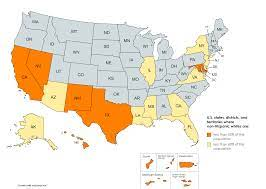

### Comparison between districts with many black/hispanic students and those with few

In [ ]:
#Districts with more than 50% black/hispanic and free/reduced is more than 50%
DistrictM=district_info.loc[(district_info['avg_pct_black/hispanic']>=0.5)& (district_info['avg_pct_free/reduced']>=0.5)]
DistrictM

In [ ]:
#Districts with less than 50% black/hispanic and free/reduced is less than 50%
DistrictN=district_info.loc[(district_info['avg_pct_black/hispanic']<0.5)& (district_info['avg_pct_free/reduced']<0.5)]
DistrictN

In [ ]:
#selecting marginalized districts
marg_district = [4808, 9043,9536,2872,2439]
prod_engM=prod_eng_clean[prod_eng_clean.district_id.isin(marg_district)]

In [ ]:
#selecting other districts
non_marg_district = [8815, 5987,9536,6046,5934]
prod_engN=prod_eng_clean[prod_eng_clean.district_id.isin(non_marg_district)]

In [ ]:
M_daily_access=group_daily_access(prod_engM,'day_name','pct_access')
M_weekly_access=group_weekly_access(prod_engM,'WeekOfYear','pct_access')
M_monthly_access=group_monthly_access(prod_engM,'month','pct_access')

N_daily_access=group_daily_access(prod_engN,'day_name','pct_access')
N_weekly_access=group_weekly_access(prod_engN,'WeekOfYear','pct_access')
N_monthly_access=group_monthly_access(prod_engN,'month','pct_access')


Generally ,marginalized districts have a higher percentage of students with access compared to other districts on both a  weekly and monthly basis. Before COVID-19,there is a significant difference between the level of access in marginalized districts and other districts. However, after COVID-19 the difference is significantly reduced.

In [ ]:
plt.plot( 'WeekOfYear', 'pct_access', data=M_weekly_access, marker='', color='olive', linewidth=2, label="marginalized_districts")
plt.plot( 'WeekOfYear', 'pct_access', data=N_weekly_access, marker='', color='olive', linewidth=2, linestyle='dashed',label="other_districts")
plt.title('Weekly comparison between the percentage of students with access in marginalized districts and other districts')
# show legend
plt.legend()
# show graph
plt.show()

plt.plot( 'month', 'pct_access', data=M_monthly_access, marker='', color='olive', linewidth=2, label="marginalized_districts")
plt.plot( 'month', 'pct_access', data=N_monthly_access, marker='', color='olive', linewidth=2, linestyle='dashed',label="other_districts")
plt.title('Monthly comparison between the percentage of students with access in marginalized districts and other districts')
# show legend
plt.legend()

# show graph
plt.show()

In [ ]:
M_daily_eng=group_daily_eng(prod_engM,'day_name','engagement_index')
M_weekly_eng=group_weekly_eng(prod_engM,'WeekOfYear','engagement_index')
M_monthly_eng=group_monthly_eng(prod_engM,'month','engagement_index')

N_daily_eng=group_daily_eng(prod_engN,'day_name','engagement_index')
N_weekly_eng=group_weekly_eng(prod_engN,'WeekOfYear','engagement_index')
N_monthly_eng=group_monthly_eng(prod_engN,'month','engagement_index')

In [ ]:
plt.plot( 'WeekOfYear', 'engagement_index', data=M_weekly_eng, marker='', color='olive', linewidth=2, label="marginalized_districts")
plt.plot( 'WeekOfYear', 'engagement_index', data=N_weekly_eng, marker='', color='olive', linewidth=2, linestyle='dashed',label="other_districts")
plt.title('Weekly comparison between the level of engagement in marginalized districts and other districts')
# show legend
plt.legend()
# show graph
plt.show()

plt.plot( 'month', 'engagement_index', data=M_monthly_eng, marker='', color='olive', linewidth=2, label="marginalized_districts")
plt.plot( 'month', 'engagement_index', data=N_monthly_eng, marker='', color='olive', linewidth=2, linestyle='dashed',label="other_districts")
plt.title('Monthly comparison between the level of engagement in marginalized districts and other districts')
# show legend
plt.legend()

# show graph
plt.show()

The level of engagement in marginalized districts pre-COVID is higher than that of other districts. However after the reopening of schools in September, the trend is seen to be reversing and the level of engagement in marginalized districts is lower than in other districts. This can be explained in the following way:

As of September 2, 2020, 73 percent of the 100 largest districts in America have chosen to instruct fully online, according to [Education Week](https://soeonline.american.edu/blog/digital-divide-in-education). This affects over eight million students. While schools in more affluent districts are able to provide laptops to all students in need, others don’t have the funding. To help increase equity, some districts have held fundraising events. For example, Chicago public schools received $50 million to provide high-speed internet to 100,000 students. Whereas other districts who lack funding, such as Palo Verde Unified School District in California, provided learning packets every two weeks instead of holding online classes.

**State intervention, practices or policies and there relationship to digital learning**

To help in bridging this gap,there  are states that have come up with policies that will aid in reducing this inequality. For example, some states have ensured that every student has access to Wi-Fi and a computer. The California Bridging the Digital Divide Fund raised $12.3 million to help allocate supplies to students, and a California digital divide task force and fund collected donations that bought 56,700 laptops and provided 94,000 hot spots, according to [EdSource](https://edsource.org/).Chicago public schools have also made headway, providing free high-speed internet to 100,000 students. Additionally, they have begun building a permanent support system for Chicago families known as Chicago Connected. This effort works with philanthropic partners to bridge initial costs and will provide internet access to families who need it most.

# Causes of the Digital Divide

This is a look into what causes the difference in the levels of engagement leading to the digital divide. 

In the blog, [School of education](https://soeonline.american.edu/blog/digital-divide-in-education/), it is estimated that 87 percent of households in the US currently have access to a computer, smartphone, tablet, or other internet-enabled device and 73 percent have access to the internet.Even though a large proportion of the country has access to digital infrastructure, a digital divide remains. The issue lies mostly with access to high-speed broadband, which is required for individuals to be able to make use of much of what’s available on the internet. Marginalized communities including people of color, low-income individuals, English-language learners, people with disabilities, and populations experiencing homelessness are among those most likely to lack access to high-speed internet. The impact of the digital divide on these students has been significant and—due to transition to online learning during the coronavirus pandemic—continues to worsen.


#### Deeper dive into connectivity in marginalized districts

From the previous analysis, there are only 2 states with a connectivity ratio higher than 0.59: North Dakota, Massachusetts. Lets look at the districts in these states and compare them to the other districts with lower connectivity ratio.

Does connectivity have an influence on engagement and access?

In [ ]:
district_info.head()
connectivity=district_info.loc[(district_info['avg_county_connections_ratio']!=0.59)]
#high connectivity districts
high_conn=[2872,2439]
high_connM=prod_engM[prod_engM.district_id.isin(high_conn)]
high_connM
#low connectivity districts
low_conn=[4808, 9043]
low_connM=prod_engM[prod_engM.district_id.isin(low_conn)]

other_conn=[9536,8815]
other_conn=prod_engN[prod_engN.district_id.isin(other_conn)]

#percentage of students with access
HighConn_daily_access=group_daily_access(high_connM,'day_name','pct_access')
HighConn_weekly_access=group_weekly_access(high_connM,'WeekOfYear','pct_access')
HighConn_monthly_access=group_monthly_access(high_connM,'month','pct_access')

LowConn_daily_access=group_daily_access(low_connM,'day_name','pct_access')
LowConn_weekly_access=group_weekly_access(low_connM,'WeekOfYear','pct_access')
LowConn_monthly_access=group_monthly_access(low_connM,'month','pct_access')


other_weekly_access=group_weekly_access(other_conn,'WeekOfYear','pct_access')
other_monthly_access=group_monthly_access(other_conn,'month','pct_access')

In [ ]:
#percentage of students with access
HighConn_daily_access=group_daily_access(high_connM,'day_name','pct_access')
HighConn_weekly_access=group_weekly_access(high_connM,'WeekOfYear','pct_access')
HighConn_monthly_access=group_monthly_access(high_connM,'month','pct_access')

LowConn_daily_access=group_daily_access(low_connM,'day_name','pct_access')
LowConn_weekly_access=group_weekly_access(low_connM,'WeekOfYear','pct_access')
LowConn_monthly_access=group_monthly_access(low_connM,'month','pct_access')


other_weekly_access=group_weekly_access(other_conn,'WeekOfYear','pct_access')
other_monthly_access=group_monthly_access(other_conn,'month','pct_access')

In [ ]:
plt.plot( 'WeekOfYear', 'pct_access', data=HighConn_weekly_access, marker='', color='green', linewidth=2, label="high_connectivity_marginalized_districts")
plt.plot( 'WeekOfYear', 'pct_access', data=LowConn_weekly_access, marker='', color='green', linewidth=2, linestyle='dashed',label="low_connectivity_marginalized_districts")
plt.plot( 'WeekOfYear', 'pct_access', data=other_weekly_access, marker='', color='blue', linewidth=2,label="connectivity_other_districts")
plt.title('Weekly comparison between the percentage of students with access in high connectivity marginalized districts and low connectivity marginalized districts')
# show legend
plt.legend()
# show graph
plt.show()

plt.plot( 'month', 'pct_access', data=HighConn_monthly_access, marker='', color='green', linewidth=2, label="high_connectivity_marginalized_districts")
plt.plot( 'month', 'pct_access', data=LowConn_monthly_access, marker='', color='green', linewidth=2, linestyle='dashed',label="low_connectivity_marginalized_districts")
plt.plot( 'month', 'pct_access', data=other_monthly_access, marker='', color='blue', linewidth=2,label="connectivity_other_districts")
plt.title('Monthly comparison between the percentage of students with access in high connectivity marginalized districts and low connectivity marginalized districts')
# show legend
plt.legend()

# show graph
plt.show()

In [ ]:
#level of engagement
HighConn_daily_eng=group_daily_eng(high_connM,'day_name','engagement_index')
HighConn_weekly_eng=group_weekly_eng(high_connM,'WeekOfYear','engagement_index')
HighConn_monthly_eng=group_monthly_eng(high_connM,'month','engagement_index')

LowConn_daily_eng=group_daily_eng(low_connM,'day_name','engagement_index')
LowConn_weekly_eng=group_weekly_eng(low_connM,'WeekOfYear','engagement_index')
LowConn_monthly_eng=group_monthly_eng(low_connM,'month','engagement_index')

other_weekly_eng=group_weekly_eng(other_conn,'WeekOfYear','engagement_index')
other_monthly_eng=group_weekly_eng(other_conn,'month','engagement_index')



In [ ]:
plt.plot( 'WeekOfYear', 'engagement_index', data=HighConn_weekly_eng, marker='', color='red', linewidth=2, label="high_connectivity_marginalized_districts")
plt.plot( 'WeekOfYear', 'engagement_index', data=LowConn_weekly_eng, marker='', color='red', linewidth=2, linestyle='dashed',label="low_connectivity_marginalized_districts")
plt.plot( 'WeekOfYear', 'engagement_index', data=other_weekly_eng, marker='', color='blue', linewidth=2,label="connectivity_other_districts")
plt.title('Weekly comparison between the level of engagement in high connectivity marginalized districts, low connectivity marginalized districts and other districts')
# show legend
plt.legend()
# show graph
plt.show()

plt.plot( 'month', 'engagement_index', data=HighConn_monthly_eng, marker='', color='red', linewidth=2, label="high_connectivity_marginalized_districts")
plt.plot( 'month', 'engagement_index', data=LowConn_monthly_eng, marker='', color='red', linewidth=2, linestyle='dashed',label="low_connectivity_marginalized_districts")
plt.plot( 'month', 'engagement_index', data=other_monthly_eng, marker='', color='blue', linewidth=2,label="connectivity_other_districts")
plt.title('Monthly comparison between the level of engagement in high connectivity marginalized districts, low connectivity marginalized districts and other districts')
# show legend
plt.legend()

# show graph
plt.show()

The level of connectivity does have an influence on engagement and access to digital learning. From the above graph, other districts(those that are not considered majority-minority districts) have a significantly higher level of engagement and access compared to majority-minority districts. Moreover, when only majority-minority districts are considered, the districts with higher broadband access had a higher level of engagement post COVID19. This shows that broadband access and affordability of internet should be considered for effective digital learning.